In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt



data=pd.read_csv("C:\\Users\\tatem\\Desktop\\weather-renewable-energy\\Dataset\\Renewable.csv")
print(data)

        Unnamed: 0                 Time  Energy delta[Wh]   GHI  temp  \
0                0  2017-01-01 00:00:00                 0   0.0   1.6   
1                1  2017-01-01 00:15:00                 0   0.0   1.6   
2                2  2017-01-01 00:30:00                 0   0.0   1.6   
3                3  2017-01-01 00:45:00                 0   0.0   1.6   
4                4  2017-01-01 01:00:00                 0   0.0   1.7   
...            ...                  ...               ...   ...   ...   
196771      196771  2022-08-31 16:45:00               118  23.7  18.6   
196772      196772  2022-08-31 17:00:00                82  15.6  18.5   
196773      196773  2022-08-31 17:15:00                51   8.0  18.5   
196774      196774  2022-08-31 17:30:00                24   2.1  18.5   
196775      196775  2022-08-31 17:45:00                 0   0.0  18.5   

        pressure  humidity  wind_speed  rain_1h  snow_1h  clouds_all  \
0           1021       100         4.9      0.0    

In [2]:
#Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              196776 non-null  int64  
 1   Time                    196776 non-null  object 
 2   Energy delta[Wh]        196776 non-null  int64  
 3   GHI                     196776 non-null  float64
 4   temp                    196776 non-null  float64
 5   pressure                196776 non-null  int64  
 6   humidity                196776 non-null  int64  
 7   wind_speed              196776 non-null  float64
 8   rain_1h                 196776 non-null  float64
 9   snow_1h                 196776 non-null  float64
 10  clouds_all              196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  hour                

In [3]:
#check for missing values
data.isnull().sum()

Unnamed: 0                0
Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
hour                      0
month                     0
dtype: int64

In [4]:
#statistics of the data
data.describe()

,Unnamed: 0,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,98387.500000,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,211.721094,748.644347,0.265187,11.498902,6.298329
std,56804.482622,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,273.902186,194.870208,0.329023,6.921887,3.376066
min,0.000000,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000,1.000000
25%,49193.750000,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,570.000000,0.000000,5.000000,3.000000
50%,98387.500000,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,30.000000,765.000000,0.050000,11.000000,6.000000
75%,147581.250000,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,390.000000,930.000000,0.530000,17.000000,9.000000
max,196775.000000,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1020.000000,1020.000000,1.000000,23.000000,12.000000


In [5]:
#defin the features and target
f = data[["hour","month"]]
t =data["Energy delta[Wh]"]

In [6]:
#Split data into training data and testing data
f_train, f_test, t_train, t_test = train_test_split (f,t,test_size=0.2, random_state=42)


In [7]:
#First Model
# Linear Regression(lr)
lr_model= LinearRegression()


In [8]:
#Train the model on the train data
lr_model.fit(f_train, t_train)


LinearRegression()

In [9]:
#Make predictions on the test data
t_predictions= lr_model.predict(f_test)

In [10]:
#Make the first 10 predictions
print(t_predictions[:10])

[692.74537116 432.26596638 502.47787937 693.40290561 603.75989168
 405.42068556 614.46174383 617.37149343 420.626968   472.0653145 ]


In [11]:
#Compare predictions with actual values
comparison = pd.DataFrame({'Actual': t_test[:10], 'Predicted': t_predictions[:10]})
print(comparison)

        Actual   Predicted
110142     392  692.745371
191706       0  432.265966
150704       0  502.477879
188361       0  693.402906
75797      881  603.759892
172776       0  405.420686
67686        0  614.461744
134025       0  617.371493
99145        0  420.626968
86867        0  472.065314


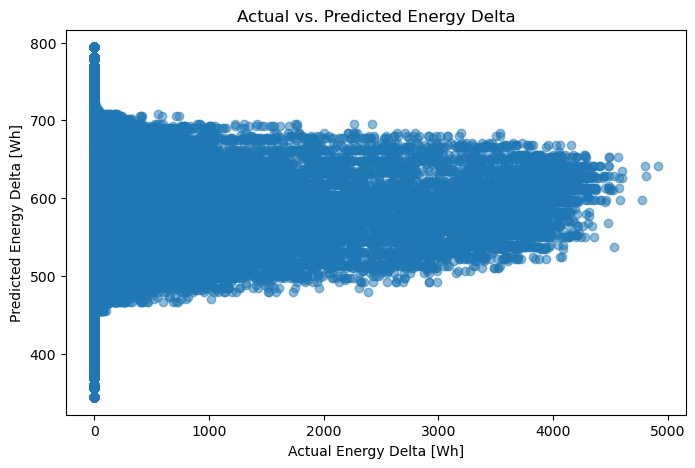

In [12]:
#Plot Predicted Vs Actual values scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(t_test, t_predictions, alpha=0.5)
plt.xlabel('Actual Energy Delta [Wh]')
plt.ylabel('Predicted Energy Delta [Wh]')
plt.title('Actual vs. Predicted Energy Delta')
plt.show()


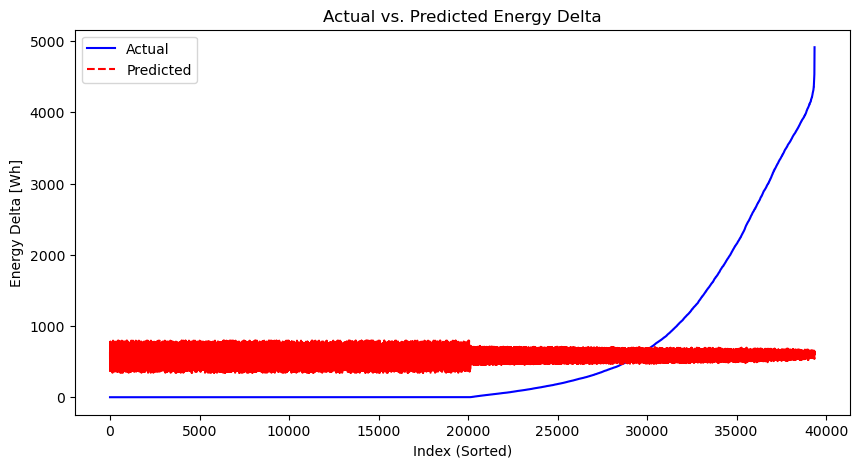

In [13]:
#Line plot of predicted vs actual values
import numpy as np
import matplotlib.pyplot as plt

# Sort the values for better visualization
sorted_indices = np.argsort(t_test.values)
t_test_sorted = t_test.values[sorted_indices]
t_predictions_sorted = t_predictions[sorted_indices]

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(t_test_sorted, label="Actual", color="blue", linestyle="-")
plt.plot(t_predictions_sorted, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Index (Sorted)")
plt.ylabel("Energy Delta [Wh]")
plt.title("Actual vs. Predicted Energy Delta")
plt.legend()
plt.show()


In [14]:
#Evaluating the model using MAE, MSE  score
mae_lr = mean_absolute_error(t_test, t_predictions)
mse_lr = mean_squared_error(t_test, t_predictions)


In [15]:
#Printing results
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)

Mean Absolute Error (MAE): 755.2146623297915
Mean Squared Error (MSE): 1092510.054326283


In [16]:
#Decision Tree Regression
#Import required libraries


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [17]:
#Creating the decision tree regressor with random state for comsistency
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)


In [18]:
#Train the decision Tree Model with the training data

dt_model.fit(f_train, t_train)


DecisionTreeRegressor(random_state=42)

In [19]:
#Making predictions on the test data

t_pred_dt = dt_model.predict(f_test)


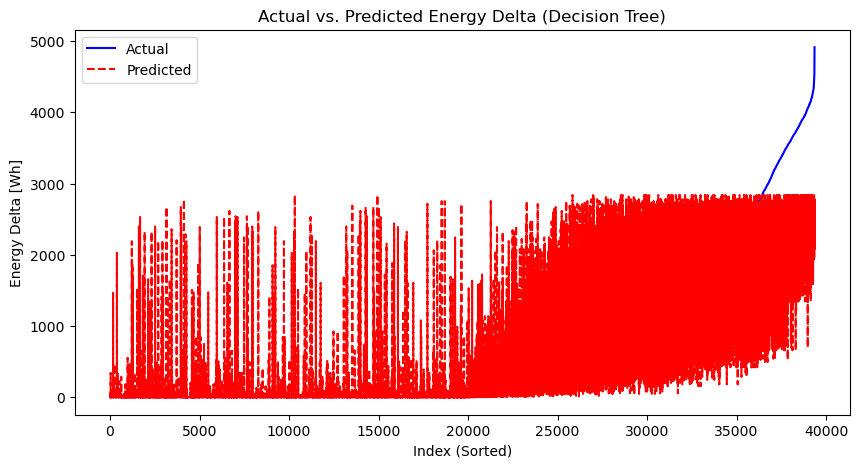

In [20]:
#Visulize  the predicted values 
# Sort values for better visualization
sorted_indices = np.argsort(t_test.values)
t_test_sorted = t_test.values[sorted_indices]
t_pred_sorted = t_pred_dt[sorted_indices]

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(t_test_sorted, label="Actual", color="blue", linestyle="-")
plt.plot(t_pred_sorted, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Index (Sorted)")
plt.ylabel("Energy Delta [Wh]")
plt.title("Actual vs. Predicted Energy Delta (Decision Tree)")
plt.legend()
plt.show()


In [21]:
#Displaying the predicted and actual values
comparison = pd.DataFrame({
    'Actual': t_test.values,
    'Predicted': t_pred_dt
})

# Display the first 10 rows
print(comparison.head(10))

   Actual    Predicted
0     392   389.321627
1       0     0.000000
2       0     0.000000
3       0     3.241319
4     881  1592.739203
5       0     0.000000
6       0     0.000000
7       0     0.000000
8       0     0.000000
9       0     0.000000


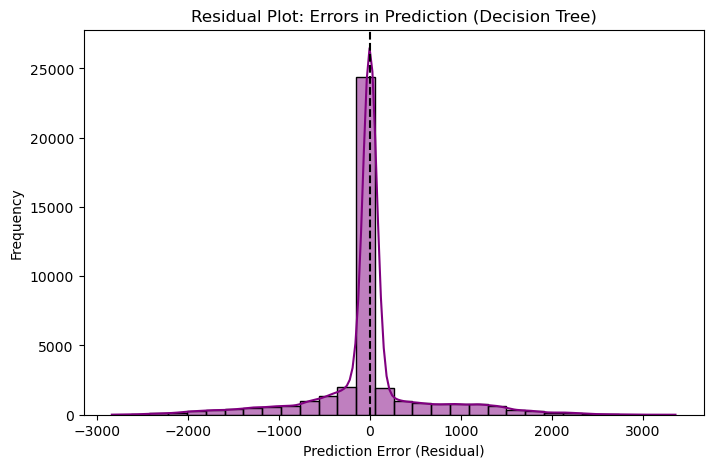

In [22]:
#Residual= Actual values - Predicted values

# Calculate residuals (errors)
import seaborn as sns
residuals = t_test - t_pred_dt

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="black", linestyle="dashed")  # Center line at zero
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Residual Plot: Errors in Prediction (Decision Tree)")
plt.show()


#IF residual is:
#   Positive residual = Prediction is too low
#   Negative residual = Prediction is too high
#   0 residual = Prediction is perfect

# Therefore this model is acurate, no bais and captures trends well


In [23]:
#Evaluating the model usinf MAE and MSE scores

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae_dt = mean_absolute_error(t_test, t_pred_dt)
mse_dt = mean_squared_error(t_test, t_pred_dt)

# Print results
print("Decision Tree Regression Evaluation:")
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)


Decision Tree Regression Evaluation:
Mean Absolute Error (MAE): 311.52682003397285
Mean Squared Error (MSE): 375322.2373184485


In [24]:

# Create a DataFrame to compare Linear Regression and Decision Tree
comparison_results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MAE": [mae_lr, mae_dt],
    "MSE": [mse_lr, mse_dt]
})

# Display the results
print(comparison_results)


               Model         MAE           MSE
0  Linear Regression  755.214662  1.092510e+06
1      Decision Tree  311.526820  3.753222e+05


In [25]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [26]:
#Training the random forest regressor
rf_model.fit(f_train, t_train)


RandomForestRegressor(random_state=42)

In [27]:
#Make predictions on the test 
t_pred_rf = rf_model.predict(f_test)

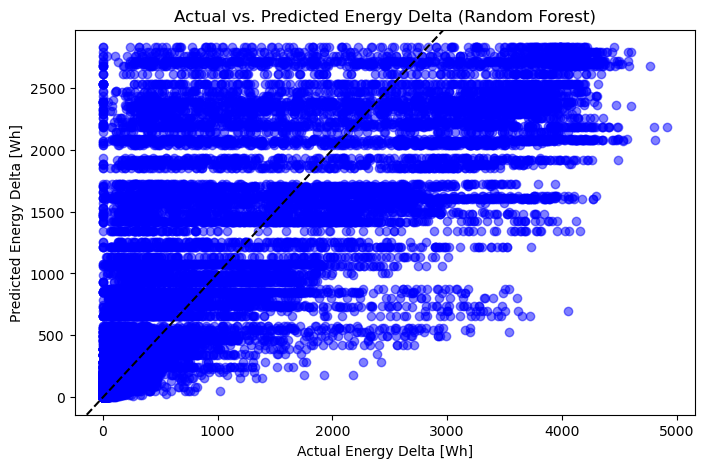

In [28]:
#Visualize the predictions with a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(t_test, t_pred_rf, alpha=0.5, color="blue")
plt.xlabel("Actual Energy Delta [Wh]")
plt.ylabel("Predicted Energy Delta [Wh]")
plt.title("Actual vs. Predicted Energy Delta (Random Forest)")
plt.axline((0, 0), slope=1, color="black", linestyle="dashed")  # Reference line (perfect predictions)
plt.show()

#If the dots are close to the doted line= the predictions are accurate
#If the dots deviate from the doted line = there are lots of errors


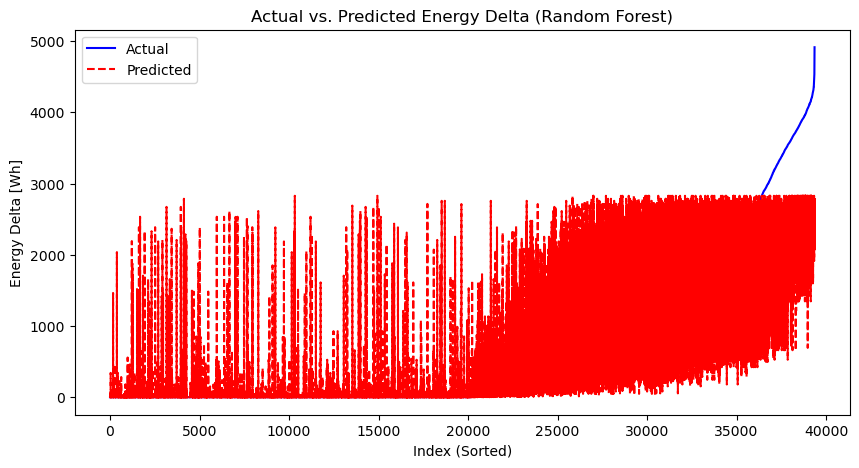

In [29]:
#Visulize the predictions using a plot graph
import numpy as np

# Sort values for better visualization
sorted_indices = np.argsort(t_test.values)
t_test_sorted = t_test.values[sorted_indices]
t_pred_sorted = t_pred_rf[sorted_indices]

plt.figure(figsize=(10, 5))
plt.plot(t_test_sorted, label="Actual", color="blue", linestyle="-")
plt.plot(t_pred_sorted, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Index (Sorted)")
plt.ylabel("Energy Delta [Wh]")
plt.title("Actual vs. Predicted Energy Delta (Random Forest)")
plt.legend()
plt.show()

# Blue line = predicted values
# Red dashed line = predicated values
# If these lines overlap = the model is accurate




In [30]:
#Evaluating the model using MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae_rf = mean_absolute_error(t_test, t_pred_rf)
mse_rf = mean_squared_error(t_test, t_pred_rf)

# Print results
print("Random Forest Regression Evaluation:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)


Random Forest Regression Evaluation:
Mean Absolute Error (MAE): 311.50082541515565
Mean Squared Error (MSE): 375310.48900008487


In [31]:
#Comparing all three of the models 
import pandas as pd

# Create a DataFrame to compare models
comparison_results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [mae_lr, mae_dt, mae_rf],
    "MSE": [mse_lr, mse_dt, mse_rf]
})

# Display the results
print(comparison_results)


               Model         MAE           MSE
0  Linear Regression  755.214662  1.092510e+06
1      Decision Tree  311.526820  3.753222e+05
2      Random Forest  311.500825  3.753105e+05


In [32]:
# MAE (mean average error):measures the average size of the errors in the predictions,
#low MAE = smaller errors (perfect model)
# High MAE = larger error(worst model)



# MSE (Mean squred error): measures the errors by squring the error befor finding the average, penalizes large errors more than smaller errors- more sensetive
# Low MSE = few large errors (perfect model)
# High MSE = more large errors (worst model)

#Therefore the best model is the Random forest

In [33]:
#Key factors influencing energy prodction
#Loading the dataset again
df=pd.read_csv(r"C:\\Users\\user\\Desktop\\Renewable_Cleaned dataset.csv")
print(df)

        Unnamed: 0                 Time  Energy delta[Wh]   GHI  temp  \
0                0  2017-01-01 00:00:00                 0   0.0   1.6   
1                1  2017-01-01 00:15:00                 0   0.0   1.6   
2                2  2017-01-01 00:30:00                 0   0.0   1.6   
3                3  2017-01-01 00:45:00                 0   0.0   1.6   
4                4  2017-01-01 01:00:00                 0   0.0   1.7   
...            ...                  ...               ...   ...   ...   
196771      196771  2022-08-31 16:45:00               118  23.7  18.6   
196772      196772  2022-08-31 17:00:00                82  15.6  18.5   
196773      196773  2022-08-31 17:15:00                51   8.0  18.5   
196774      196774  2022-08-31 17:30:00                24   2.1  18.5   
196775      196775  2022-08-31 17:45:00                 0   0.0  18.5   

        pressure  humidity  wind_speed  rain_1h  snow_1h  clouds_all  \
0           1021       100         4.9      0.0    

In [34]:
if "Time" in df.columns:
    df = df.drop(columns=["Time"])
    
    

In [35]:
# Check for any remaining non-numeric columns
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Unnamed: 0                  int64
Energy delta[Wh]            int64
GHI                       float64
temp                      float64
pressure                    int64
humidity                    int64
wind_speed                float64
rain_1h                   float64
snow_1h                   float64
clouds_all                  int64
sunlightTime                int64
dayLength                   int64
SunlightTime/daylength    float64
hour                        int64
month                       int64
dtype: object


In [36]:
# Define target variable (y)
y = df["Energy delta[Wh]"]

# Define features (X) - all columns except "Energy Delta (Wh)"
X = df.drop(columns=["Energy delta[Wh]"])

# Confirm the shape of X and y
print("Feature Matrix (X) Shape:", X.shape)
print("Target Variable (y) Shape:", y.shape)


Feature Matrix (X) Shape: (196776, 14)
Target Variable (y) Shape: (196776,)


In [37]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shape of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (157420, 14)
Testing Features Shape: (39356, 14)
Training Target Shape: (157420,)
Testing Target Shape: (39356,)


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model on the training data
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [39]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Display the first 10 actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test.values[:10], "Predicted": y_pred[:10]})
print(comparison_df)


   Actual  Predicted
0     392     539.23
1       0       0.00
2       0       0.00
3       0       0.00
4     881    1175.24
5       0       0.00
6       0       0.00
7       0       0.00
8       0       0.00
9       0       0.00


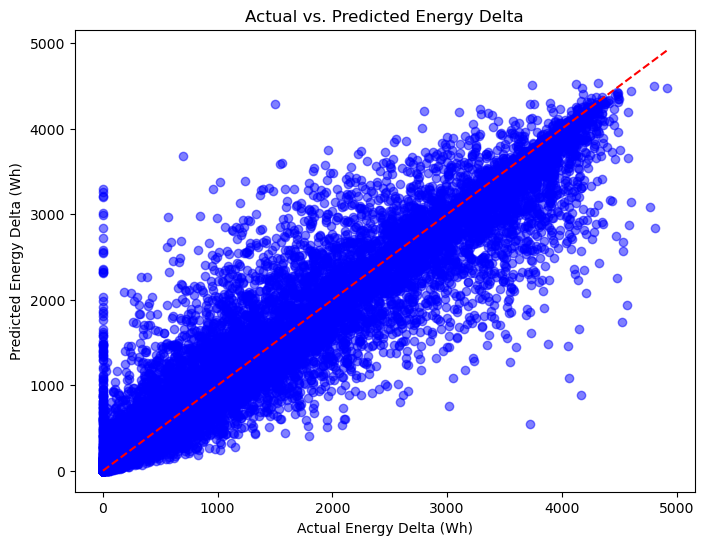

In [40]:
#Visualizing the results
import matplotlib.pyplot as plt

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect predictions line
plt.xlabel("Actual Energy Delta (Wh)")
plt.ylabel("Predicted Energy Delta (Wh)")
plt.title("Actual vs. Predicted Energy Delta")
plt.show()

#Blue dots= actual values
# Red line= Predicted values
# If the blue dots ar close to red line = the model is making good predictions

In [41]:
#Evaluations
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Random Forest Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Random Forest Regression Evaluation:
Mean Absolute Error (MAE): 104.17251549954263
Mean Squared Error (MSE): 68016.19133547618


In [42]:
import numpy as np

# Get feature importance values
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort features by importance (highest to lowest)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the feature importance scores
print(importance_df)

#the higher the importance value = the greater the impact on energy production


                   Feature  Importance
1                      GHI    0.855975
10               dayLength    0.050323
11  SunlightTime/daylength    0.013864
0               Unnamed: 0    0.013530
8               clouds_all    0.010461
2                     temp    0.009994
9             sunlightTime    0.009644
5               wind_speed    0.008169
12                    hour    0.007605
4                 humidity    0.007411
3                 pressure    0.006202
13                   month    0.003652
6                  rain_1h    0.002952
7                  snow_1h    0.000218


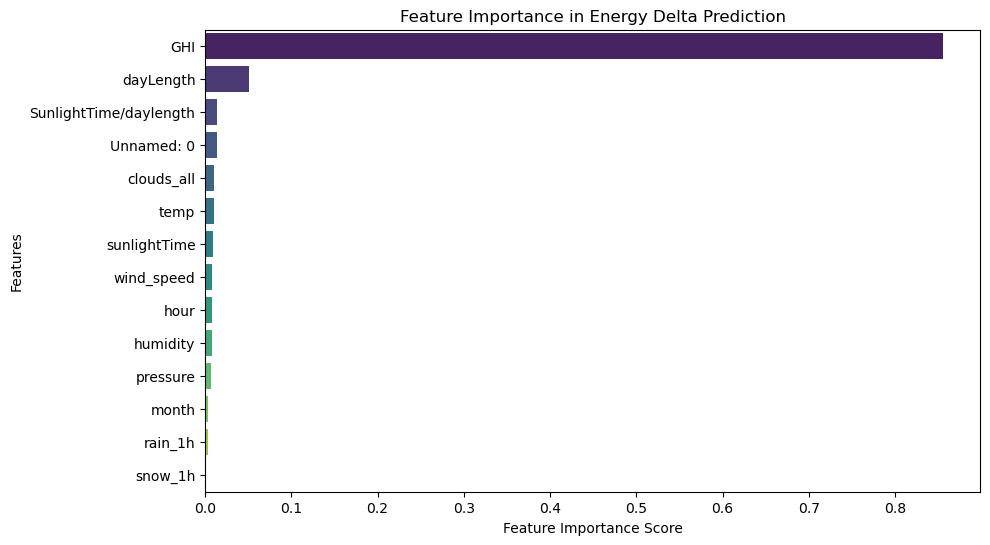

In [43]:
#visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Energy Delta Prediction")
plt.show()
